# Diabetes Prediction with K-Means, GMM, and PCA

In [46]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.matlib
import pandas as pd
import seaborn as sns
import numpy.linalg as la
from sklearn.preprocessing import normalize
from matplotlib import colors as mcolors
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import mixture
%matplotlib inline

In [47]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Cleaning

In [3]:
df.isnull().any().any()
data = df 

In [4]:
df = df.drop(columns='Outcome') #dropping class column to exclude it from clustering algorithm
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


# PCA

In [5]:
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [6]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [7]:
dfarr = df.to_numpy().T #convert to matrix/numpy array
dfarr

array([[  6.   ,   1.   ,   8.   , ...,   5.   ,   1.   ,   1.   ],
       [148.   ,  85.   , 183.   , ..., 121.   , 126.   ,  93.   ],
       [ 72.   ,  66.   ,  64.   , ...,  72.   ,  60.   ,  70.   ],
       ...,
       [ 33.6  ,  26.6  ,  23.3  , ...,  26.2  ,  30.1  ,  30.4  ],
       [  0.627,   0.351,   0.672, ...,   0.245,   0.349,   0.315],
       [ 50.   ,  31.   ,  32.   , ...,  30.   ,  47.   ,  23.   ]])

In [8]:
mean = np.mean(dfarr, axis=1, keepdims=True)  # Calculate mean for each feature
A = dfarr - mean  # Subtract mean from each row

# implementing the transpose trick - finding eigenvectors of A'A
eigvals_old, Vold = np.linalg.eig(np.dot(A.T, A))

V, D = eigsort(Vold, eigvals_old)  # sorting eigenvectors in order of decreasing eigenvalues

U = normc(np.dot(A, V))
c = np.dot(U.T, A)  # principal component coordinates

/tmp/ipykernel_4978/621088768.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  Vsort[:,i] = V[:,index[i]]


In [9]:
#adding the first three principal components to our dataframes
data['X'] = c[0]
data['Y'] = c[1]
data['Z'] = c[2]
df['X'] = c[0]
df['Y'] = c[1]
df['Z'] = c[2]

U size: (8, 8)
s size: (8,)
Vt size: (8, 768)


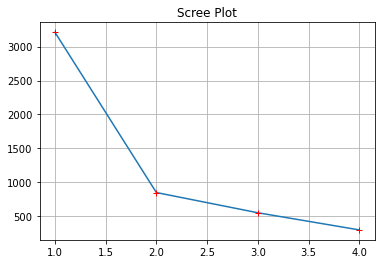

In [10]:
U, s, Vt = np.linalg.svd(A,full_matrices = False)
print('U size:',U.shape)
print('s size:',s.shape)
print('Vt size:',Vt.shape)

plt.grid(True)
plt.title('Scree Plot')
plt.plot([1, 2, 3,4],[s[0],s[1],s[2],s[4]])
plt.plot([1, 2, 3,4],[s[0],s[1],s[2],s[4]],'+',color='red')

Running PCA on and using the first three columns to create X, Y, and Z points for each datapoint and adding these columns to both the df and data dataframes.

In [11]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,X,Y,Z
0,6,148,72,35,0,33.6,0.627,50,1,-75.714655,-35.950783,7.260789
1,1,85,66,29,0,26.6,0.351,31,0,-82.358268,28.908213,5.496671
2,8,183,64,0,0,23.3,0.672,32,1,-74.630643,-67.906496,-19.461808
3,1,89,66,23,94,28.1,0.167,21,0,11.077423,34.898486,0.053018
4,0,137,40,35,168,43.1,2.288,33,1,89.743788,-2.746937,-25.212859
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,99.237881,25.080927,19.534825
764,2,122,70,27,0,36.8,0.340,27,0,-78.641239,-7.688010,4.137227
765,5,121,72,23,112,26.2,0.245,30,0,32.113198,3.376665,1.587864
766,1,126,60,0,0,30.1,0.349,47,1,-80.214494,-14.186020,-12.351264


Text(0.5, 1.0, '2D datapoints w/o classification')

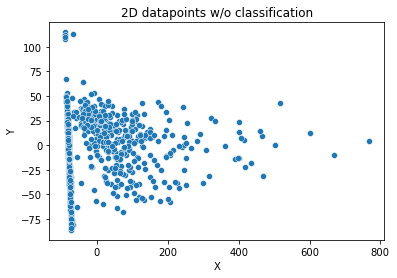

In [12]:
sns.scatterplot(x = 'X', y = 'Y', data = data) #actual clusters
plt.title('2D datapoints w/o classification')

Text(0.5, 1.0, '2D datapoints with actual classification')

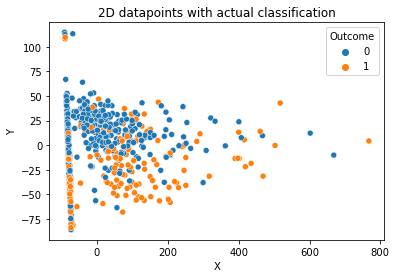

In [13]:
sns.scatterplot(x = 'X', y = 'Y', hue = 'Outcome', data = data) #actual clusters
plt.title('2D datapoints with actual classification')

Text(0.5, 0.92, '3D datapoints w/o classification')

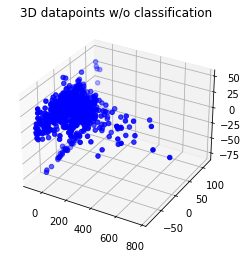

In [14]:
#%matplotlib qt
#uncomment the line above and rerun for interactable 3D plot
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(data['X'],data['Y'],data['Z'], color='blue')
plt.title('3D datapoints w/o classification')

Text(0.5, 0.92, '3D datapoints with actual classification')

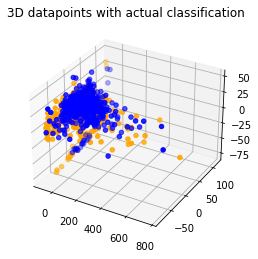

In [15]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(data[(data['Outcome']==1)]['X'],data[(data['Outcome']==1)]['Y'],data[(data['Outcome']==1)]['Z'], color='orange')
ax.scatter3D(data[(data['Outcome']==0)]['X'],data[(data['Outcome']==0)]['Y'],data[(data['Outcome']==0)]['Z'], color='blue')
plt.title('3D datapoints with actual classification')

# K-Means

In [16]:
df['K-Means Raw'] = 0
df['K-Means PCA'] = 0
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,X,Y,Z,K-Means Raw,K-Means PCA
0,6,148,72,35,0,33.6,0.627,50,-75.714655,-35.950783,7.260789,0,0
1,1,85,66,29,0,26.6,0.351,31,-82.358268,28.908213,5.496671,0,0
2,8,183,64,0,0,23.3,0.672,32,-74.630643,-67.906496,-19.461808,0,0
3,1,89,66,23,94,28.1,0.167,21,11.077423,34.898486,0.053018,0,0
4,0,137,40,35,168,43.1,2.288,33,89.743788,-2.746937,-25.212859,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,99.237881,25.080927,19.534825,0,0
764,2,122,70,27,0,36.8,0.340,27,-78.641239,-7.688010,4.137227,0,0
765,5,121,72,23,112,26.2,0.245,30,32.113198,3.376665,1.587864,0,0
766,1,126,60,0,0,30.1,0.349,47,-80.214494,-14.186020,-12.351264,0,0


In [17]:
def calcSqDistances(X, Kmus):
    N = np.shape(X)[0]
    K = Kmus.shape[0]
    D = [] 
    for point in X:
        for kpoint in Kmus:
            D.append(np.sqrt(np.sum((point - kpoint)**2)))
    D = np.array(D)
    D = D.reshape((N, K))                 
    return D

In [18]:
def determineRnk(sqDmat):
    m,n = sqDmat.shape
    for arr in sqDmat:
        index = np.argmin(arr, axis = None, out = None)
        for i in range(n):
            if not i==index:
                arr[i] = 0
        arr[index] = 1
    return sqDmat

In [19]:
def recalcMus(X, Rnk):
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk,axis=0))).T

In [20]:
def runKMeans3D(K, data):
    X = data.to_numpy()
    if data.shape[1] > 3: 
        X = data.iloc[:,0:9].to_numpy() #making sure to exclude the PCA data if we're running on original data
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus 
        clus = Rnk.T[0]
        clus = clus.astype('int')
        data['Rnk'] = clus
        Kmus = recalcMus(X, Rnk)
        fig = plt.figure()
        ax = plt.axes(projection ='3d')
        ax.scatter3D(data[(data['Rnk']==1)]['X'],data[(data['Rnk']==1)]['Y'],data[(data['Rnk']==1)]['Z'], color='orange')
        ax.scatter3D(data[(data['Rnk']==0)]['X'],data[(data['Rnk']==0)]['Y'],data[(data['Rnk']==0)]['Z'], color='blue')
        plt.show()    
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break   
        
    return Rnk.astype('int')

In [21]:
def runKMeans(K, data):
    X = data.to_numpy()
    if data.shape[1] > 2: 
        X = data.iloc[:,0:9].to_numpy() #making sure to exclude the PCA data if we're running on original data
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus 
        clus = Rnk.T[0]
        clus = clus.astype('int')
        data['Rnk'] = clus
        Kmus = recalcMus(X, Rnk)
        sns.scatterplot(x = 'X', y = 'Y', hue = 'Rnk', data = data)
        if Kmus.shape[1] > 2: #for when data is more than two dimensions
            c = np.dot(U.T, Kmus.T - np.tile(mean, (1, K))) #PCA for the Kmu points which are 9 dimensional in this case
            plt.scatter(c[0],c[1],marker='x',color='k',s=80)
        else:
            plt.scatter(Kmus[0][0],Kmus[0][1],marker='x',color='k',s=80) #plotting mean center for cluster 1
            plt.scatter(Kmus[1][0],Kmus[1][1],marker='x',color='k',s=80) #plotting mean center for cluster 2
        plt.show()
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break               
    return Rnk.astype('int')

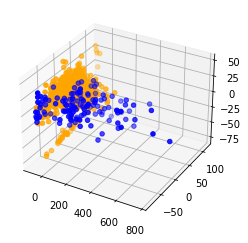

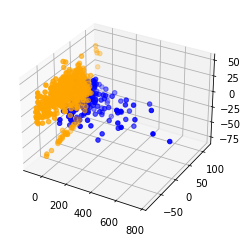

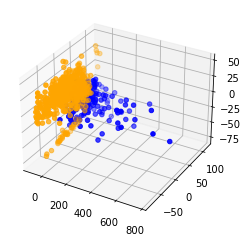

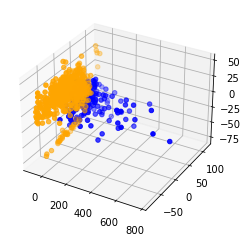

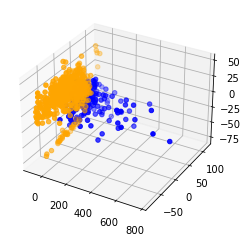

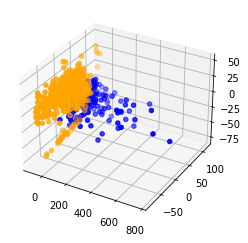

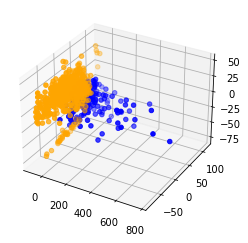

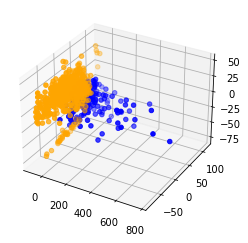

In [22]:
IIID_Rnk = runKMeans3D(2,df) #K-Means on raw data same as before but with 3D plotting cause its fancy
df['K-Means Raw'] = IIID_Rnk

In [23]:
df = df.drop(columns = ['Rnk'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,X,Y,Z,K-Means Raw,K-Means PCA
0,6,148,72,35,0,33.6,0.627,50,-75.714655,-35.950783,7.260789,1,0
1,1,85,66,29,0,26.6,0.351,31,-82.358268,28.908213,5.496671,1,0
2,8,183,64,0,0,23.3,0.672,32,-74.630643,-67.906496,-19.461808,1,0
3,1,89,66,23,94,28.1,0.167,21,11.077423,34.898486,0.053018,1,0
4,0,137,40,35,168,43.1,2.288,33,89.743788,-2.746937,-25.212859,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,99.237881,25.080927,19.534825,0,0
764,2,122,70,27,0,36.8,0.340,27,-78.641239,-7.688010,4.137227,1,0
765,5,121,72,23,112,26.2,0.245,30,32.113198,3.376665,1.587864,1,0
766,1,126,60,0,0,30.1,0.349,47,-80.214494,-14.186020,-12.351264,1,0


# Gaussian Mixture Models

tied pca matches: 549
tied raw matches: 504
full pca matches: 504
full raw matches: 366
diag pca matches: 507
diag raw matches: 366
spherical pca matches: 546
spherical raw matches: 457


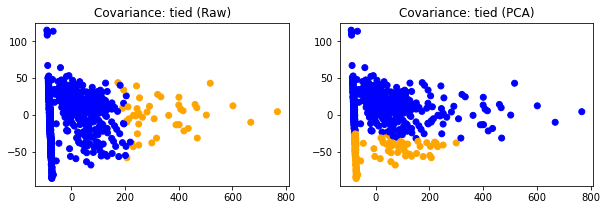

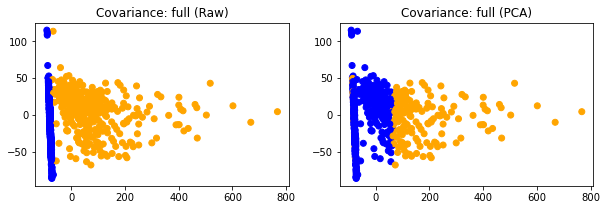

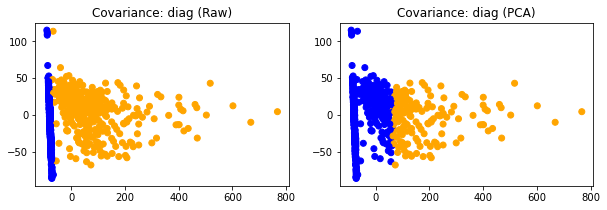

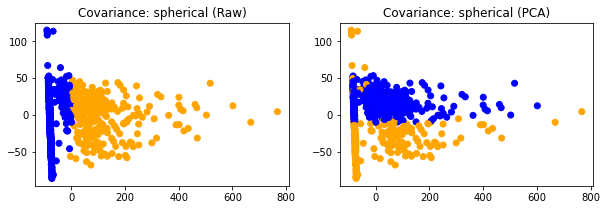

In [24]:
rawX = df.iloc[:, :9]           # Raw data columns
pcaX = df.iloc[:, 9:-1]         # PCA data columns

covTypes = ['tied', 'full', 'diag', 'spherical']        # Different covariance types
# 'full' (each component has its own general covariance matrix),
# 'tied' (all components share the same general covariance matrix),
# 'diag' (each component has its own diagonal covariance matrix),
# 'spherical' (each component has its own single variance).

for cov in covTypes:
    gmmRaw = mixture.GaussianMixture(n_components=2, covariance_type=cov).fit(rawX)
    labelRaw = gmmRaw.predict(rawX)     # Prediction for Raw data
    gmmPCA = mixture.GaussianMixture(n_components=2, covariance_type=cov).fit(pcaX)
    labelPCA = gmmPCA.predict(pcaX)     # Prediction for PCA data

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 3)
    colors = {0: 'blue', 1: 'orange'}
    ax1.scatter(df['X'], df['Y'], c=[colors[i] for i in labelRaw])
    ax1.set_title('Covariance: '+cov+' (Raw)')
    ax2.scatter(df['X'], df['Y'], c=[colors[i] for i in labelPCA])
    ax2.set_title('Covariance: '+cov+' (PCA)')
    print(cov, 'pca matches:', sum(data['Outcome']==labelPCA))
    print(cov, 'raw matches:', sum(data['Outcome']==labelRaw))

# Covariance Type 'spherical' best! Save into df as 'gmmRaw' and 'gmmPCA' columns
df['gmmRaw'] = labelRaw
df['gmmPCA'] = labelPCA

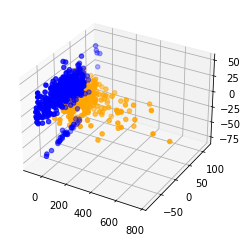

In [25]:
# 3D GMM - Raw data
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(data[(df['gmmRaw']==1)]['X'],df[(df['gmmRaw']==1)]['Y'],df[(df['gmmRaw']==1)]['Z'], color='orange')
ax.scatter3D(data[(df['gmmRaw']==0)]['X'],df[(df['gmmRaw']==0)]['Y'],df[(df['gmmRaw']==0)]['Z'], color='blue')

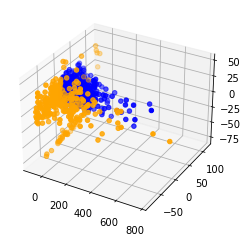

In [26]:
# 3D GMM - PCA data
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter3D(data[(df['gmmPCA']==1)]['X'],df[(df['gmmPCA']==1)]['Y'],df[(df['gmmPCA']==1)]['Z'], color='orange')
ax.scatter3D(data[(df['gmmPCA']==0)]['X'],df[(df['gmmPCA']==0)]['Y'],df[(df['gmmPCA']==0)]['Z'], color='blue')

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,X,Y,Z,K-Means Raw,K-Means PCA,gmmRaw,gmmPCA
0,6,148,72,35,0,33.6,0.627,50,-75.714655,-35.950783,7.260789,1,0,0,1
1,1,85,66,29,0,26.6,0.351,31,-82.358268,28.908213,5.496671,1,0,0,0
2,8,183,64,0,0,23.3,0.672,32,-74.630643,-67.906496,-19.461808,1,0,0,1
3,1,89,66,23,94,28.1,0.167,21,11.077423,34.898486,0.053018,1,0,1,0
4,0,137,40,35,168,43.1,2.288,33,89.743788,-2.746937,-25.212859,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,99.237881,25.080927,19.534825,0,0,1,0
764,2,122,70,27,0,36.8,0.340,27,-78.641239,-7.688010,4.137227,1,0,0,0
765,5,121,72,23,112,26.2,0.245,30,32.113198,3.376665,1.587864,1,0,1,0
766,1,126,60,0,0,30.1,0.349,47,-80.214494,-14.186020,-12.351264,1,0,0,1


# Model Accuracy

<b>K-Means Model Accuracy</b>

                  K-Means Raw


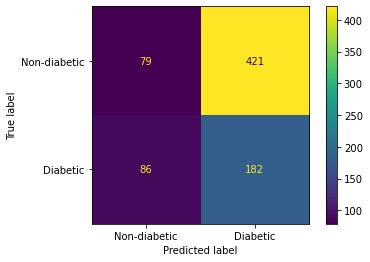

In [29]:
y_true = data['Outcome']
y_pred = df['K-Means Raw']
np.array(confusion_matrix(y_true, y_pred).ravel()).reshape(2,2)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred),display_labels=['Non-diabetic','Diabetic'])
disp.plot() 
print('\033[1m' + '                  K-Means Raw')

In [33]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
TPR = tp/(tp + fn)
TNR = tn/(tn + fp)
print("True Non-Diabetic Rate: ",TPR)
print("True Diabetic Rate: ", TNR)
TR = (tp+tn)/(tn+fn+tp+fp)
print("True Total Rate: ",TR)

True Non-Diabetic Rate:  0.0
True Diabetic Rate:  1.0
True Total Rate:  0.6510416666666666


                  K-Means PCA


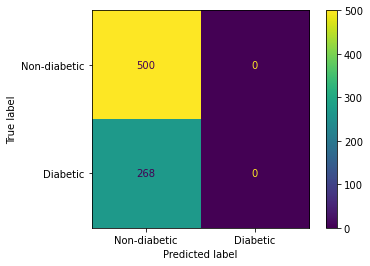

In [34]:
y_true = data['Outcome']
y_pred = df['K-Means PCA']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred),display_labels=['Non-diabetic','Diabetic'])
disp.plot() 
print('\033[1m' + '                  K-Means PCA')

In [35]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
TPR = tp/(tp + fn)
TNR = tn/(tn + fp)
print("True Diabetic Rate: ",TPR)
print("True Non-diabetic Rate: ", TNR)
TR = (tp+tn)/(tn+fn+tp+fp)
print("True Total Rate: ",TR)

True Diabetic Rate:  0.0
True Non-diabetic Rate:  1.0
True Total Rate:  0.6510416666666666


<b>GMM Model Accuracy</b>

In [36]:
# Model Accuracy for GMM
print('GMM (Raw) Accuracy:', sum(data['Outcome']==df['gmmRaw']))
print('GMM (PCA) Accuracy:', sum(data['Outcome']==df['gmmPCA']))

GMM (Raw) Accuracy: 457
GMM (PCA) Accuracy: 546


            GMM Raw - Confusion Matrix


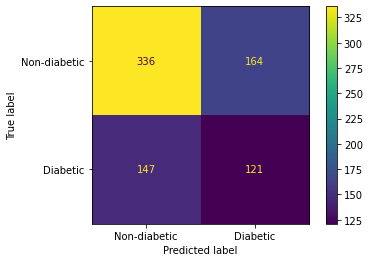

In [38]:
# Gaussian Mixture Models - Raw
y_true = data['Outcome']
yRaw = df['gmmRaw']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, yRaw),display_labels=['Non-diabetic','Diabetic'])
disp.plot() 

tn, fp, fn, tp = confusion_matrix(y_true, yRaw).ravel()
TPR = tp/(tp + fn)
TNR = tn/(tn + fp)
TR = (tp+tn)/(tn+fn+tp+fp)
print('\033[1m' + '            GMM Raw - Confusion Matrix')

In [44]:
print("True Diabetic Rate: ",TPR)
print("True Non-Diabetic Rate: ", TNR)
print("True Total Rate: ",TR)

True Diabetic Rate:  0.6417910447761194
True Non-Diabetic Rate:  0.748
True Total Rate:  0.7109375


            GMM PCA - Confusion Matrix


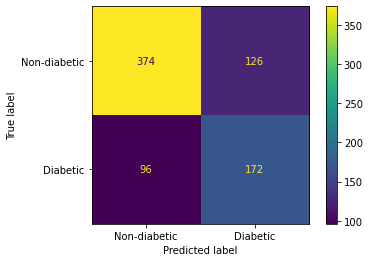

In [40]:
# Gaussian Mixture Models - PCA
y_true = data['Outcome']
yPCA = df['gmmPCA']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, yPCA),display_labels=['Non-diabetic','Diabetic'])
disp.plot() 

tn, fp, fn, tp = confusion_matrix(y_true, yPCA).ravel()
TPR = tp/(tp + fn)
TNR = tn/(tn + fp)
TR = (tp+tn)/(tn+fn+tp+fp)
print('\033[1m' + '            GMM PCA - Confusion Matrix')

In [45]:
print("True Diabetic Rate: ",TPR)
print("True Non-diabetic Rate: ", TNR)
print("True Total Rate: ",TR)

True Diabetic Rate:  0.6417910447761194
True Non-diabetic Rate:  0.748
True Total Rate:  0.7109375


# Predicted VS Actual Cluster Assignment Plots

In [42]:
df['Actual Assignemnts'] = data['Outcome']
df.iloc[0:30,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,X,Y,Z,K-Means Raw,K-Means PCA,gmmRaw,gmmPCA,Actual Assignemnts
0,6,148,72,35,0,33.6,0.627,50,-75.714655,-35.950783,7.260789,1,0,0,1,1
1,1,85,66,29,0,26.6,0.351,31,-82.358268,28.908213,5.496671,1,0,0,0,0
2,8,183,64,0,0,23.3,0.672,32,-74.630643,-67.906496,-19.461808,1,0,0,1,1
3,1,89,66,23,94,28.1,0.167,21,11.077423,34.898486,0.053018,1,0,1,0,0
4,0,137,40,35,168,43.1,2.288,33,89.743788,-2.746937,-25.212859,0,0,1,1,1
5,5,116,74,0,0,25.6,0.201,30,-80.977922,-3.946887,-0.641395,1,0,0,0,0
6,3,78,50,32,88,31.0,0.248,26,4.350959,46.933912,-9.183418,1,0,1,0,1
7,10,115,0,0,0,35.3,0.134,29,-82.137294,7.097954,-67.488999,1,0,0,1,0
8,2,197,70,45,543,30.5,0.158,53,468.866389,-31.528258,-10.057072,0,0,1,1,1
9,8,125,96,0,0,0.0,0.232,54,-80.193850,-18.048283,18.049763,1,0,0,1,1


As expected, they are the same for the most part with a couple errors made here and there.

Text(0.5, 0.92, 'GMM PCA Cluster Assignments')

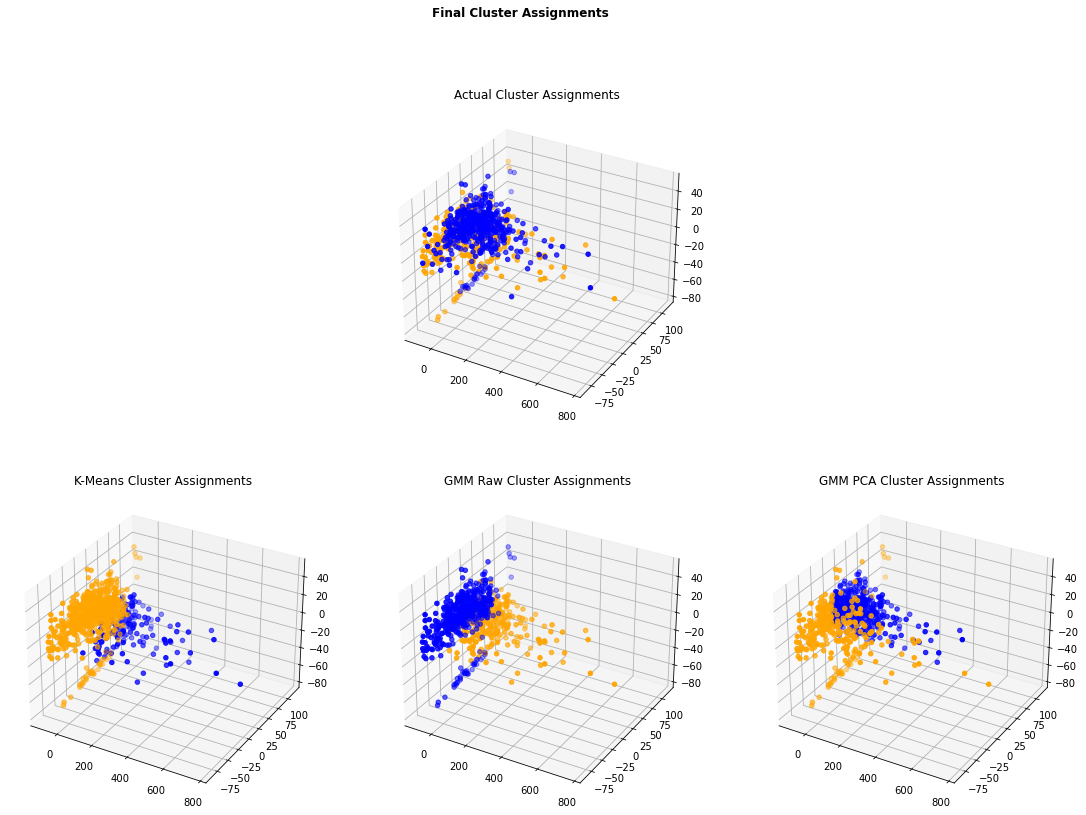

In [43]:
fig = plt.figure(figsize=(19,13))  
ax1 = fig.add_subplot(232, projection='3d')
ax2 = fig.add_subplot(234, projection='3d')
ax3 = fig.add_subplot(235, projection='3d')
ax4 = fig.add_subplot(236, projection='3d')

ax1.scatter3D(data[(data['Outcome']==1)]['X'],data[(data['Outcome']==1)]['Y'],data[(data['Outcome']==1)]['Z'], color='orange')
ax1.scatter3D(data[(data['Outcome']==0)]['X'],data[(data['Outcome']==0)]['Y'],data[(data['Outcome']==0)]['Z'], color='blue')
fig.suptitle('Final Cluster Assignments', fontweight ="bold")
ax1.set_title('Actual Cluster Assignments')


ax2.scatter3D(data[(df['K-Means Raw']==1)]['X'],df[(df['K-Means Raw']==1)]['Y'],
             df[(df['K-Means Raw']==1)]['Z'], color='orange')
ax2.scatter3D(data[(df['K-Means Raw']==0)]['X'],df[(df['K-Means Raw']==0)]['Y'],
             df[(df['K-Means Raw']==0)]['Z'], color='blue')
ax2.set_title('K-Means Cluster Assignments')

ax3.scatter3D(data[(df['gmmRaw']==1)]['X'],df[(df['gmmRaw']==1)]['Y'],
             df[(df['gmmRaw']==1)]['Z'], color='orange')
ax3.scatter3D(data[(df['gmmRaw']==0)]['X'],df[(df['gmmRaw']==0)]['Y'],
             df[(df['gmmRaw']==0)]['Z'], color='blue')
ax3.set_title('GMM Raw Cluster Assignments')

ax4.scatter3D(data[(df['gmmPCA']==1)]['X'],df[(df['gmmPCA']==1)]['Y'],
             df[(df['gmmPCA']==1)]['Z'], color='orange')
ax4.scatter3D(data[(df['gmmPCA']==0)]['X'],df[(df['gmmPCA']==0)]['Y'],
             df[(df['gmmPCA']==0)]['Z'], color='blue')
ax4.set_title('GMM PCA Cluster Assignments')